In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import FuncFormatter

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [3]:
spotify_data_untidy = pd.read_csv("data/spotify_most_streamed_2024.zip",encoding = 'ISO-8859-1')
spotify_data_untidy

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

Lets see what columns there are:

In [4]:
spotify_data_untidy.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

Lets change the names of the columns first:

In [5]:
spotify_data_renamed = spotify_data_untidy.rename(columns = {col : col.lower().replace(" ", "_") for col in spotify_data_untidy.columns})
spotify_data_renamed

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


We can see, that some data hasnt been read correctly. Now lets convert the release_date into a datetime type.

First lets check if there are any missing values in the release_date:

In [6]:
spotify_data_renamed["release_date"].hasnans

False

Now lets try to convert it:

In [7]:
spotify_data_correct_release_date = spotify_data_renamed
spotify_data_correct_release_date["release_date"] = pd.to_datetime(spotify_data_renamed["release_date"])
spotify_data_correct_release_date.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                         object
track_score                          float64
spotify_streams                       object
spotify_playlist_count                object
spotify_playlist_reach                object
spotify_popularity                   float64
youtube_views                         object
youtube_likes                         object
tiktok_posts                          object
tiktok_likes                          object
tiktok_views                          object
youtube_playlist_reach                object
apple_music_playlist_count           float64
airplay_spins                         object
siriusxm_spins                        object
deezer_playlist_count                float64
deezer_playlist_reach                 object
amazon_pla

We can see, that there are many columns where there should be integers, but there are objects. Lets look into all_time_rank for example:

In [8]:
spotify_data_correct_release_date["all_time_rank"].unique()

array(['1', '2', '3', ..., '4,571', '4,591', '4,593'], dtype=object)

We can see, that the formatting isnt great, because the thousands are separated with a comma. Lets fix this issue.

In [9]:
spotify_data_correct_types = spotify_data_correct_release_date
spotify_data_correct_types["all_time_rank"] = spotify_data_correct_release_date["all_time_rank"].str.replace(",", "").astype(int)

Lets check if we converted it correctly:

In [10]:
spotify_data_correct_types["all_time_rank"].dtypes

dtype('int64')

We can see, that it worked, but for the rest of the columns, lets convert them to float if there is nan.

In [11]:
for col in spotify_data_correct_types:
    try:
        if(spotify_data_correct_types[col].str.match("^[0-9,]+$").all()):
            try:
                spotify_data_correct_types[col] = spotify_data_correct_types[col].str.replace(",", "").astype(int)
                continue
            except(ValueError, TypeError):
                spotify_data_correct_types[col] = spotify_data_correct_types[col].str.replace(",", "").astype(float)
    except(AttributeError):
        continue
spotify_data_correct_types.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                          int64
track_score                          float64
spotify_streams                      float64
spotify_playlist_count               float64
spotify_playlist_reach               float64
spotify_popularity                   float64
youtube_views                        float64
youtube_likes                        float64
tiktok_posts                         float64
tiktok_likes                         float64
tiktok_views                         float64
youtube_playlist_reach               float64
apple_music_playlist_count           float64
airplay_spins                        float64
siriusxm_spins                       float64
deezer_playlist_count                float64
deezer_playlist_reach                float64
amazon_pla

There is also the explicit_track, which should be boolean:

In [12]:
spotify_data_correct_types["explicit_track"] = spotify_data_correct_types["explicit_track"].astype(bool)

Now lets see how many columns have many nans:

In [13]:
for col in spotify_data_correct_types:
    print(str(col) + ": " + str(spotify_data_correct_types[col].isna().sum()))

track: 0
album_name: 0
artist: 5
release_date: 0
isrc: 0
all_time_rank: 0
track_score: 0
spotify_streams: 113
spotify_playlist_count: 70
spotify_playlist_reach: 72
spotify_popularity: 804
youtube_views: 308
youtube_likes: 315
tiktok_posts: 1173
tiktok_likes: 980
tiktok_views: 981
youtube_playlist_reach: 1009
apple_music_playlist_count: 561
airplay_spins: 498
siriusxm_spins: 2123
deezer_playlist_count: 921
deezer_playlist_reach: 928
amazon_playlist_count: 1055
pandora_streams: 1106
pandora_track_stations: 1268
soundcloud_streams: 3333
shazam_counts: 577
tidal_popularity: 4600
explicit_track: 0


As we can see, the tidal_popularity column has only nans:

In [14]:
spotify_data_correct_types["tidal_popularity"].unique()

array([nan])

So lets drop it:

In [15]:
spotify_data_correct_types = spotify_data_correct_types.drop("tidal_popularity", axis = 1)
spotify_data_correct_types.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'explicit_track'],
      dtype='object')

Lets call the cleaned dataset by a different name:

In [16]:
spotify_data_tidy = spotify_data_correct_types

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

Lets see the five artists with most songs:

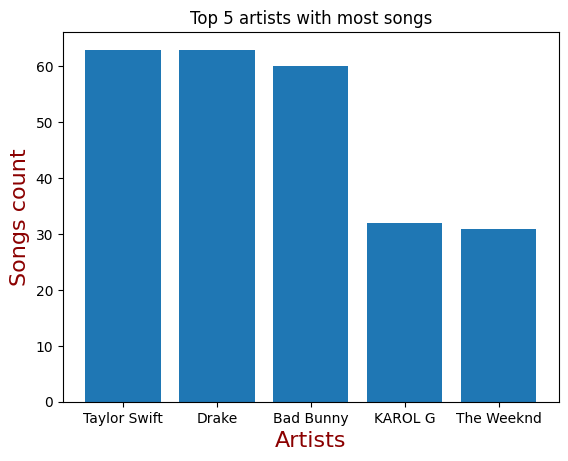

In [17]:
plt.bar(spotify_data_tidy["artist"].value_counts().head(5).index, spotify_data_tidy["artist"].value_counts().head(5))

plt.title("Top 5 artists with most songs")
plt.xlabel("Artists", fontsize = 16, color = "darkred")
plt.ylabel("Songs count", fontsize = 16, color = "darkred")

plt.show()

Now lets create an array with artists

In [18]:
artists_arr = pd.Series(spotify_data_tidy["artist"].unique())

Now lets see...

In [19]:
artists_song_counts = spotify_data_tidy["artist"].value_counts()
clean_mouthed = pd.Series()
for artist in artists_song_counts.index:
    artist_clean_songs = spotify_data_tidy[(spotify_data_tidy["artist"] == artist) & (spotify_data_tidy["explicit_track"] == 0)]
    if len(artist_clean_songs) == artists_song_counts[artist]:
        clean_mouthed = pd.concat([clean_mouthed, pd.Series([artist])])
clean_mouthed

0     Imagine Dragons
0                 BTS
0          Luke Combs
0         Linkin Park
0                 Sia
           ...       
0    Cali Y El Dandee
0          Baby Flaco
0         NONT TANONT
0        Hugh Jackman
0      Fadhilah Intan
Length: 1321, dtype: object

In [20]:
clean_mouthed

0     Imagine Dragons
0                 BTS
0          Luke Combs
0         Linkin Park
0                 Sia
           ...       
0    Cali Y El Dandee
0          Baby Flaco
0         NONT TANONT
0        Hugh Jackman
0      Fadhilah Intan
Length: 1321, dtype: object

We can see, that the clean-mouthed artists are not 5, but in fact 1321

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

Lets make another table with the artist and his overall listens on Spotify:

In [21]:
artist_listeners = pd.DataFrame(columns = ["artist", "spotify_streams"])

artist_listeners["artist"] = spotify_data_tidy["artist"].unique()
for artist in artist_listeners["artist"]:
    streams = spotify_data_tidy[spotify_data_tidy["artist"] == artist]["spotify_streams"].sum()
    artist_listeners.loc[artist_listeners["artist"] == artist, "spotify_streams"] = streams

Now lets see the top 5 and plot a bar chart:

In [22]:
top_5_artists = artist_listeners.sort_values(by = ["spotify_streams"], ascending = False).head(5)
top_5_artists

,artist,spotify_streams
55,Bad Bunny,37054834425.0
48,The Weeknd,36948540278.0
119,Drake,34962157577.0
16,Taylor Swift,34470771165.0
10,Post Malone,26137472958.0


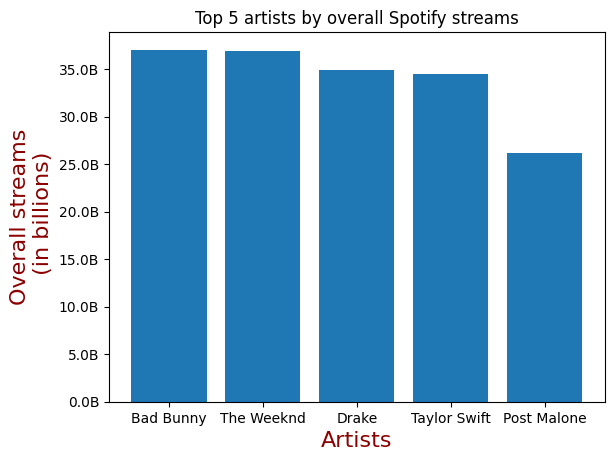

In [23]:
# defining a billions formatter for our  yticks
def billions_formatter(x, pos):
    return f'{x * 1e-9:.1f}B'

plt.bar(top_5_artists["artist"], top_5_artists["spotify_streams"])

plt.xlabel("Artists", fontsize = 16, color = "darkred")
plt.ylabel("Overall streams\n (in billions)", fontsize = 16, color = "darkred")
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.title("Top 5 artists by overall Spotify streams")
plt.show()

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

Lets create a bar chart for the release years of the songs in the database:

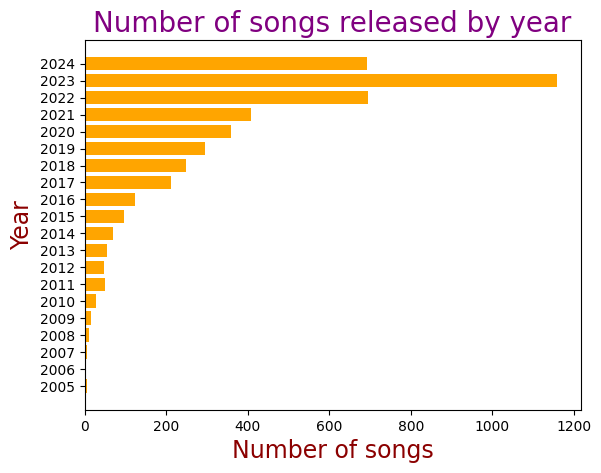

In [24]:
year_range = [year for year in range (2005, 2025)]

song_count_year = []
for year in year_range:
    song_count_year.append(spotify_data_tidy[spotify_data_tidy["release_date"].dt.year == year]["release_date"].count())

song_count_year

plt.barh(year_range, song_count_year, color = "orange")
plt.title("Number of songs released by year", fontsize = 20, color = "purple")

plt.xlabel("Number of songs", fontsize = 17, color = "darkred")

plt.ylabel("Year", fontsize = 17, color = "darkred")
plt.yticks(year_range)

plt.show()

Now lets do the same for the months:

Text(0, 0.5, 'Number of songs')

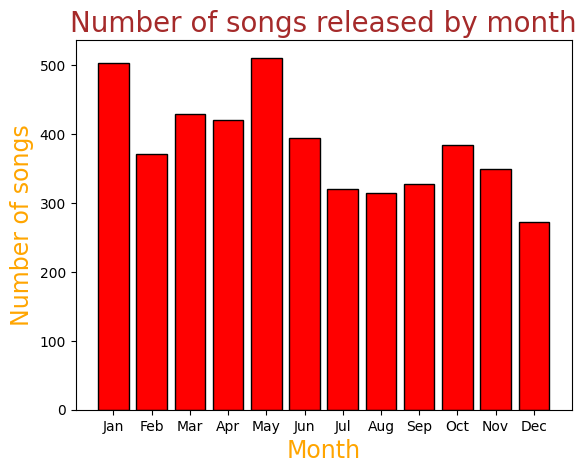

In [25]:
months = {1 : "Jan",
          2 : "Feb",
          3 : "Mar",
          4 : "Apr",
          5 : "May",
          6 : "Jun",
          7 : "Jul",
          8 : "Aug",
          9 : "Sep",
          10 : "Oct",
          11 : "Nov",
          12 : "Dec",}
song_count_month = []
for i in range (1, 13):
    song_count_month.append(spotify_data_tidy[spotify_data_tidy["release_date"].dt.month == i]["release_date"].count())

plt.bar([months[i] for i in range (1, 13)], song_count_month, color = "red", edgecolor = "black")
plt.title("Number of songs released by month", fontsize = 20, color = "brown")

plt.xlabel("Month", fontsize = 17, color = "orange")
plt.ylabel("Number of songs", fontsize = 17, color = "orange")

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

Lets look at the values for the playlists:

In [26]:
spotify_data_tidy[["spotify_playlist_count", "apple_music_playlist_count", "deezer_playlist_count", "amazon_playlist_count"]]

,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
0,30716.0,210.0,62.0,114.0
1,28113.0,188.0,67.0,111.0
2,54331.0,190.0,136.0,172.0
3,269802.0,394.0,264.0,210.0
4,7223.0,182.0,82.0,105.0
...,...,...,...,...
4595,65770.0,3.0,2.0,NaN
4596,4602.0,1.0,1.0,NaN
4597,72066.0,19.0,1.0,6.0
4598,14037.0,1.0,NaN,7.0


It doesnt look like there would be a strong correlation between the values, but lets calculate it to see for sure:

In [27]:
playlist_counts = spotify_data_tidy[["spotify_playlist_count", "apple_music_playlist_count", "deezer_playlist_count", "amazon_playlist_count"]]
playlist_counts.corr()

,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
spotify_playlist_count,1.000000,0.685886,0.560208,0.382226
apple_music_playlist_count,0.685886,1.000000,0.775710,0.665635
deezer_playlist_count,0.560208,0.775710,1.000000,0.568904
amazon_playlist_count,0.382226,0.665635,0.568904,1.000000


As we can see, the numbers vary, but there is a strong correlation between the Apple Music and the Deezer playlist counts. There is also a relatively weak correlation between the Spotify and Apple Music playlist counts. Thats interesting.

Lets create scatterplots to see how this correlation looks like:

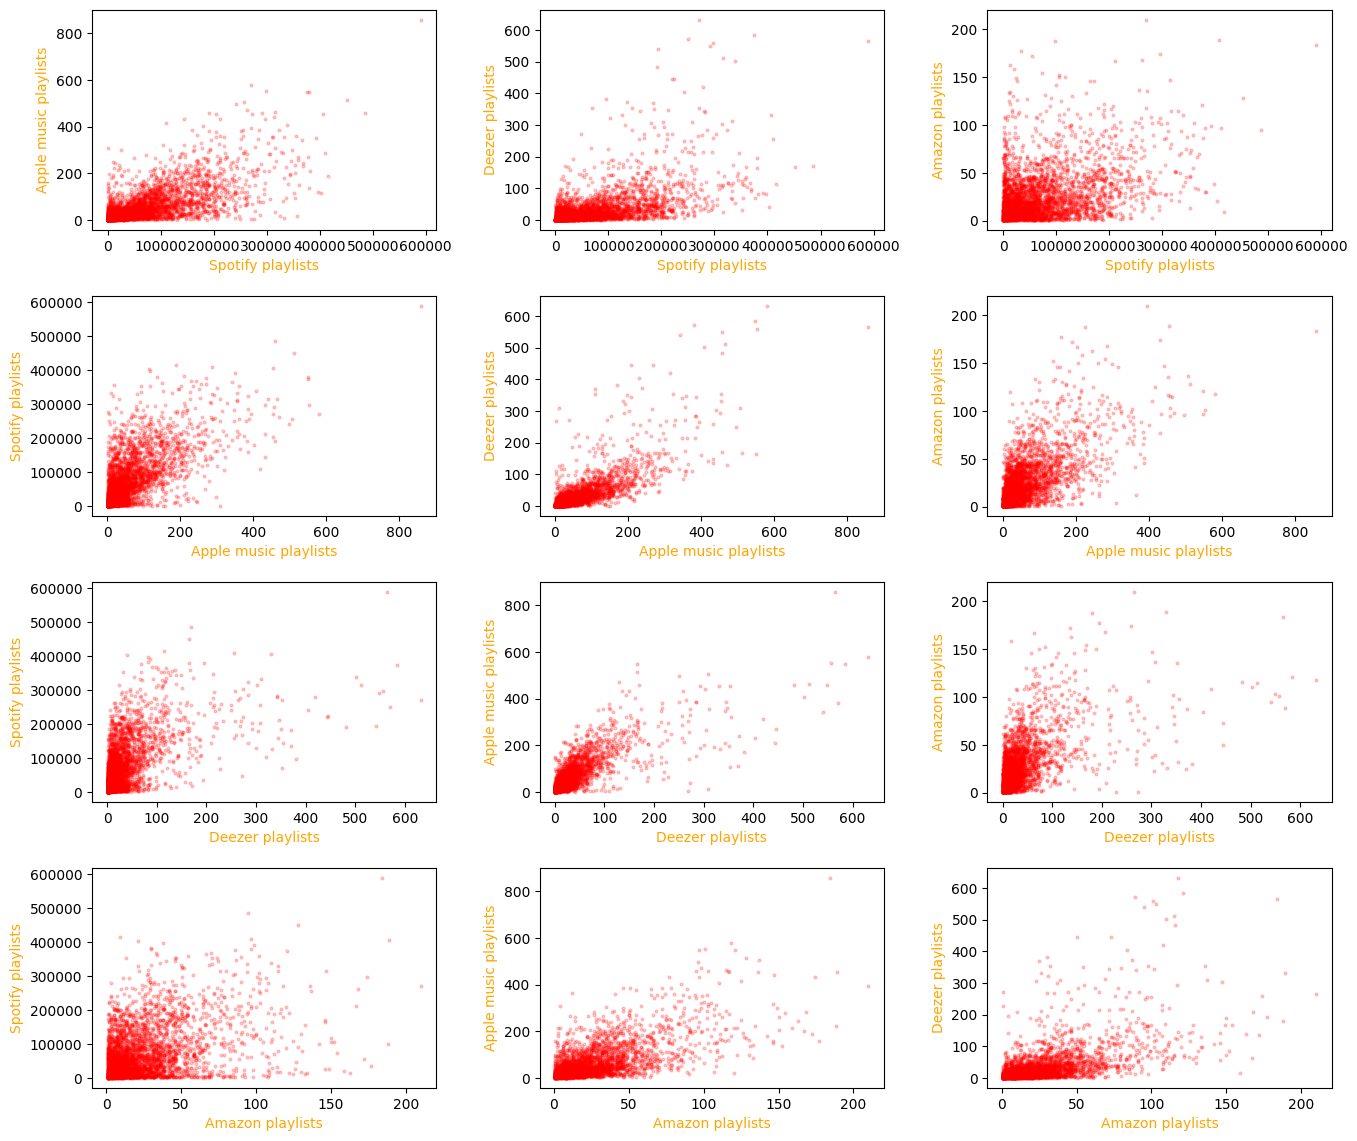

In [76]:
fig, axes = plt.subplots(4, 3, figsize = (16, 14))

plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
values_dict = {0 : "spotify_playlist_count",
               1 : "apple_music_playlist_count",
               2 : "deezer_playlist_count",
               3 : "amazon_playlist_count"}

for i in range (0, 4):
    for j in range (0, 4):
        if i == j:
            continue
        elif i > j:
            ax = axes[i, j]
        else:
            ax = axes[i, j - 1]
            
        ax.scatter(spotify_data_tidy[values_dict[i]], spotify_data_tidy[values_dict[j]], s = 4, color = "red", alpha = 0.2)
        ax.set_xlabel(values_dict[i].replace("_count", "s").replace("_", " ").capitalize(), fontsize = 10, color = "orange")
        ax.set_ylabel(values_dict[j].replace("_count", "s").replace("_", " ").capitalize(), fontsize = 10, color = "orange")

As we can see, there are no surprises and the results resemble the numbers .

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

Lets take a look at the values side by side first:

In [89]:
spotify_data_tidy[["youtube_views", "youtube_likes"]]

,youtube_views,youtube_likes
0,8.427475e+07,1713126.0
1,1.163470e+08,3486739.0
2,1.225991e+08,2228730.0
3,1.096101e+09,10629796.0
4,7.737396e+07,3670188.0
...,...,...
4595,1.492477e+08,1397590.0
4596,9.439202e+08,5347766.0
4597,2.010273e+08,1081402.0
4598,1.118595e+09,3868828.0


There seems to be a strong correlation between the two. Lets calculate it:

In [33]:
spotify_data_tidy["youtube_views"].corr(spotify_data_tidy["youtube_likes"])

np.float64(0.8338970218433363)

In [98]:
spotify_data_tidy[~(spotify_data_tidy["youtube_likes"].isna())]["youtube_likes"].unique().max()

np.float64(62311179.0)

Just as we guessed, there is a very strong correlation, which will become obvious on a scatterplot:

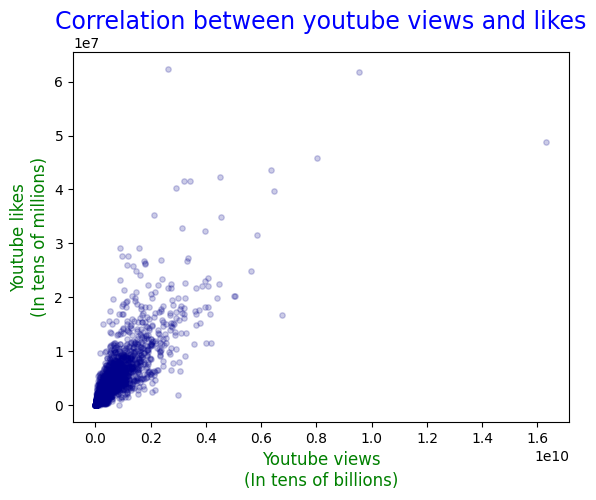

In [104]:
plt.scatter(spotify_data_tidy["youtube_views"], spotify_data_tidy["youtube_likes"], s = 15, color = "darkblue", alpha = 0.2)

plt.title("Correlation between youtube views and likes", fontsize = 17, color = "blue")

plt.xlabel("Youtube views\n(In tens of billions)", fontsize = 12, color = "green")
plt.ylabel("Youtube likes\n(In tens of millions)", fontsize = 12, color = "green")

plt.show()

Now lets take a look at the ratio between YouTube views and likes:

In [112]:
views_to_likes_ratio = spotify_data_tidy["youtube_views"] / spotify_data_tidy["youtube_likes"]
views_to_likes_ratio.describe()

count      4285.000000
mean        169.116113
std        1978.564598
min           6.929676
25%          75.524433
50%         111.001674
75%         167.772855
max      129287.789776
dtype: float64

In [132]:
# TODO plot the distribution

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.